# Imports


In [286]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [287]:
import numpy as np
from scripts.gaussian_streaming_clusterer import CluStream
from scripts.gaussian_dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [288]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [289]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [290]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 43971
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 16 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.707693001534312), np.float64(5.150806579303515), np.float64(9.261356511242132), np.float64(7.569929252658103)]
prod0 - center: [np.float64(5.567936712258932), np.float64(5.129121760187998), np.float64(9.254707049486088), np.float64(7.579307852968055)]
hellinger distance: 0.0

ref0 - center: [np.float64(5.707693001534312), np.float64(5.150806579303515), np.float64(9.261356511242132), np.float64(7.569929252658103)]
prod1 - center: [np.float64(3.5265862258459104), np.float64(7.740816073200767), np.float64(10.622481955524847), np.float64(10.841748846724153)]
hellinger distance: 0.9977802636708186

ref1 - center: [np.float64(3.565996066574339), np.float64(7.768456296786395), np.float64(10.614812503033932), np.float64(10.838149732887883)]
prod0 - center: [np.float64(5.567936712258932), np.float64(5.129121760187998), np.float64(9

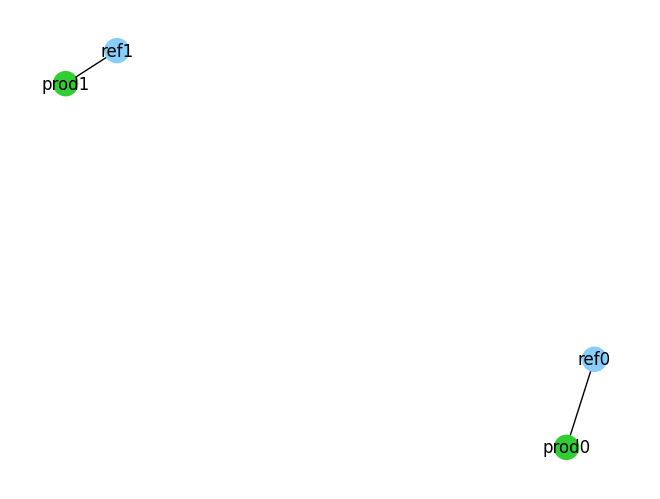

(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 134 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.567936712258932), np.float64(5.129121760187998), np.float64(9.254707049486088), np.float64(7.579307852968055)]
prod0 - center: [np.float64(5.131905632537046), np.float64(4.813729731863043), np.float64(9.152604902959022), np.float64(7.681884482459638)]
hellinger distance: 0.0

ref0 - center: [np.float64(5.567936712258932), np.float64(5.129121760187998), np.float64(9.254707049486088), np.float64(7.579307852968055)]
prod1 - center: [np.float64(3.171610633788284), np.float64(7.572935155970685), np.float64(10.715180239105146), np.float64(10.676052878835948)]
hellinger distance: 0.9926363358976525

ref1 - center: [np.float64(3.5265862258459104), np.float64(7.740816073200

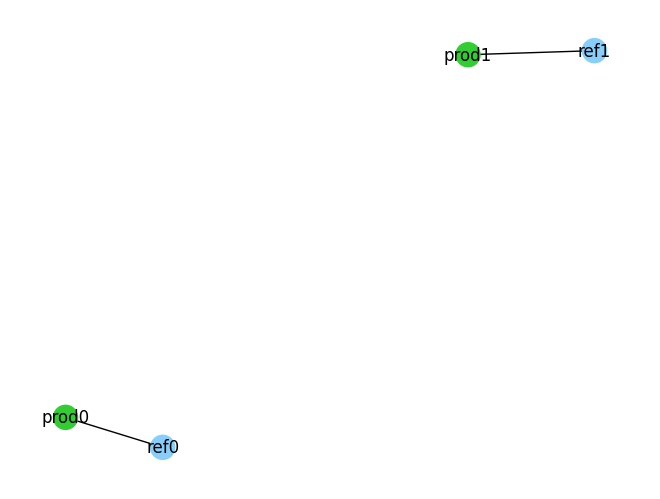

(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 213 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.131905632537046), np.float64(4.813729731863043), np.float64(9.152604902959022), np.float64(7.681884482459638)]
prod0 - center: [np.float64(3.105989178473857), np.float64(7.528772885987723), np.float64(10.579419308718206), np.float64(10.708476516866437)]
hellinger distance: 0.9913909230865908

ref0 - center: [np.float64(5.131905632537046), np.float64(4.813729731863043), np.float64(9.152604902959022), np.float64(7.681884482459638)]
prod1 - center: [np.float64(4.831243441047458), np.float64(4.749893623897643), np.float64(9.152082869874437), np.float64(7.763283163339758)]
hellinger distance: 0.0

ref1 - center: [np.float64(3.171610633788284), np.float64(7.5729351559706

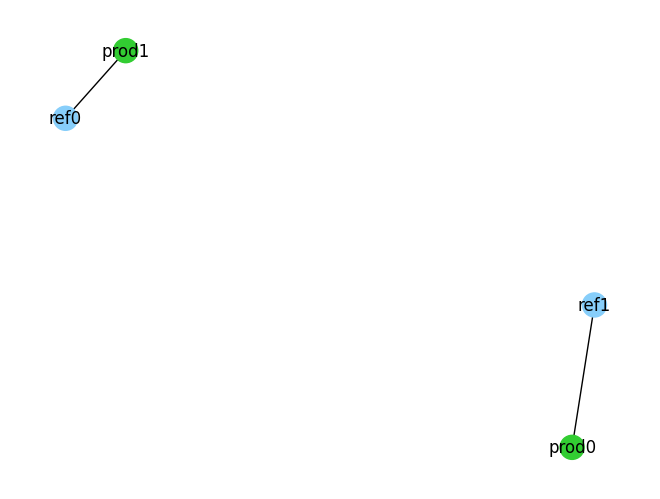

(id: 1) SURVIVED as (id: 1) (score: 1.0)
(id: 0) SURVIVED as (id: 0) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 415 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.831243441047458), np.float64(4.749893623897643), np.float64(9.152082869874437), np.float64(7.763283163339758)]
prod0 - center: [np.float64(1.8787531271276188), np.float64(6.14602227830125), np.float64(9.369928982992523), np.float64(10.11424472117134)]
hellinger distance: 0.9378792754995746

ref0 - center: [np.float64(4.831243441047458), np.float64(4.749893623897643), np.float64(9.152082869874437), np.float64(7.763283163339758)]
prod1 - center: [np.float64(5.923524870453853), np.float64(5.161705721075444), np.float64(9.209931634797654), np.float64(7.544320108247733)]
hellinger distance: 0.4245041198802609

ref0 - center: [np.float64(4.831243441047458), np.float64(4.

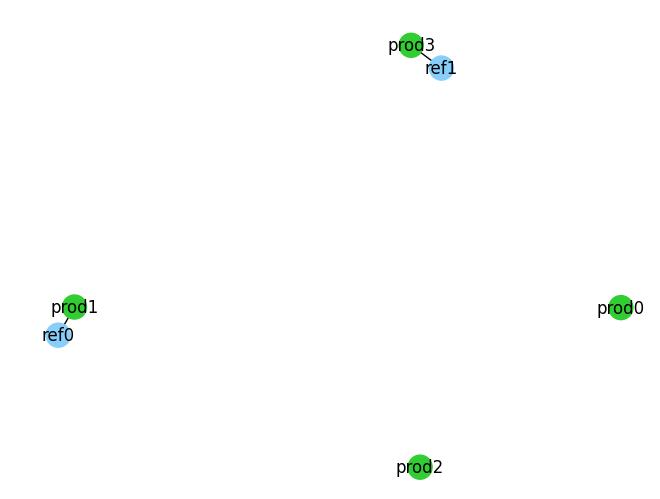

(!) (id: 2) APPEARED --- (score: 0.7146309937695142)
(id: 0) SURVIVED as (id: 0) (score: 0.5754958801197392)
(!) (id: 3) APPEARED --- (score: 0.5534654890005591)
(id: 1) SURVIVED as (id: 1) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 678 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.923524870453853), np.float64(5.161705721075444), np.float64(9.209931634797654), np.float64(7.544320108247733)]
prod0 - center: [np.float64(2.3910494897069263), np.float64(4.134656694022754), np.float64(8.778260142395876), np.float64(8.459248762765329)]
hellinger distance: 0.9990507577566228

ref0 - center: [np.float64(5.923524870453853), np.float64(5.161705721075444), np.float64(9.209931634797654), np.float64(7.544320108247733)]
prod1 - center: [np.float64(3.5655112292901787), np.float64(7.726158827647041), np.float64(10.627060980

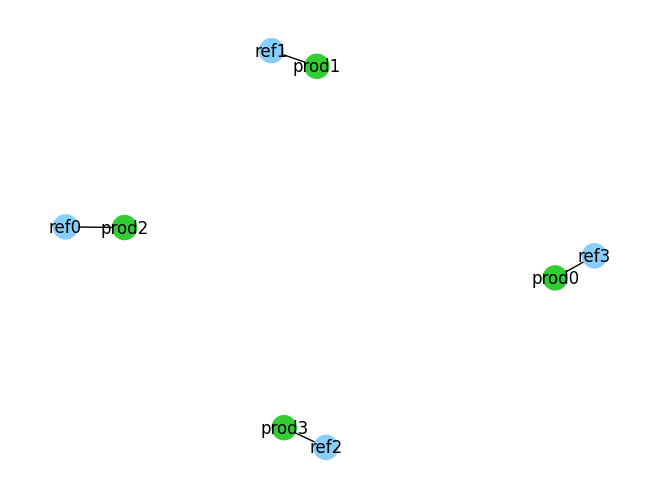

(id: 3) SURVIVED as (id: 3) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 1.0)
(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 2) SURVIVED as (id: 2) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering

ref0 - center: [np.float64(5.933864080294834), np.float64(5.164736107398839), np.float64(9.197518139593925), np.float64(7.543392687157585)]
prod0 - center: [np.float64(3.5994549630702557), np.float64(7.794847322479696), np.float64(10.709635674383973), np.float64(10.82835216648956)]
hellinger distance: 0.9988400572156274

ref0 - center: [np.float64(5.933864080294834), np.float64(5.164736107398839), np.float64(9.197518139593925), np.float64(7.543392687157585)]
prod1 - center: [np.float64(5.9072806631511545), np.float64(5.18581308643648), np.float64(9.211392402682511), np.float64(7.545012269695933)]
hellinger distance: 0.0

ref0 - center: [np.floa

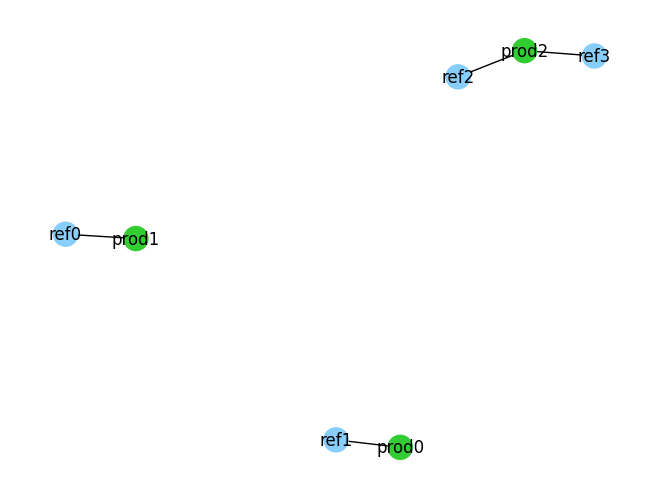

(id: 1) SURVIVED as (id: 1) (score: 1.0)
(id: 0) SURVIVED as (id: 0) (score: 1.0)
(!) [2, 3] are MERGED in (id: 4) (overlapping scores: [np.float64(0.7232207735490116), np.float64(1.0)])

Final macroclusters:
(id: 0)
(id: 1)
(id: 4)

-----------------------------------------------------------------------------------



In [291]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(print_graph=True, print_statistics=True, macroclustering_at_end=True)

Creating the directory...
Drawing ...


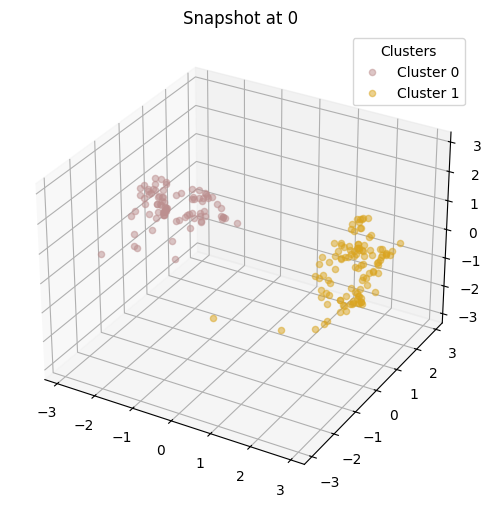

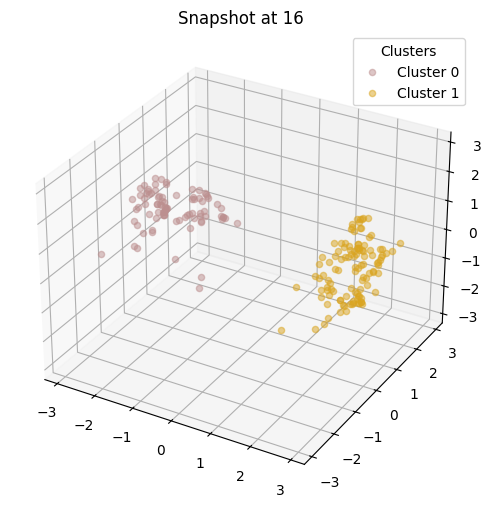

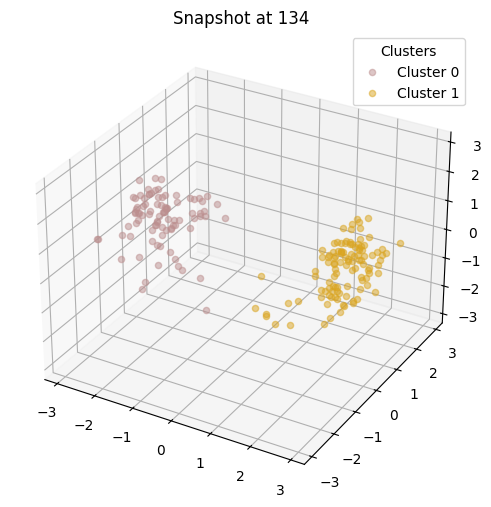

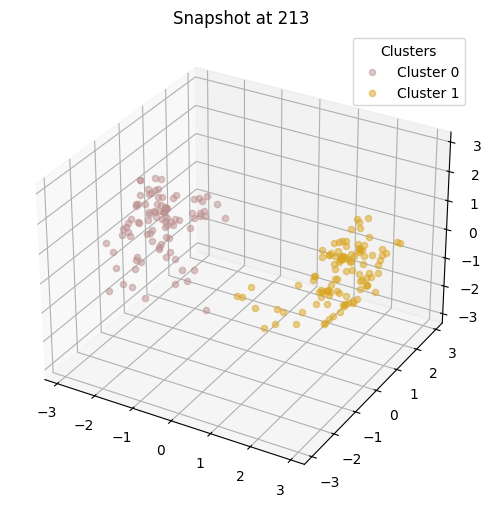

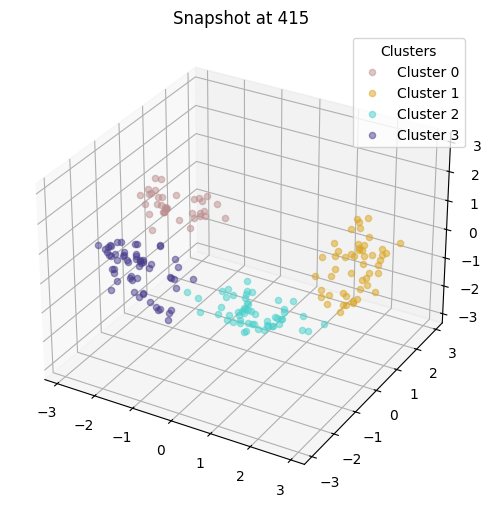

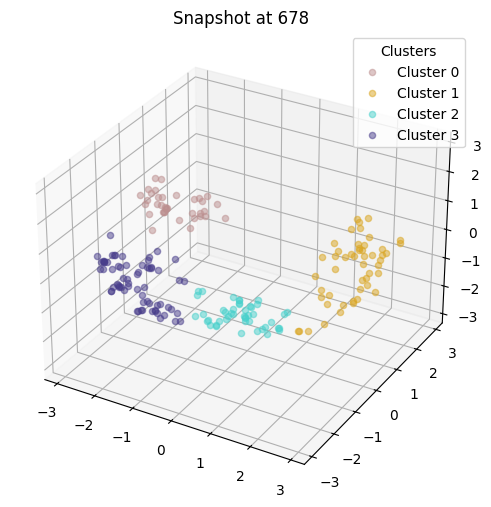

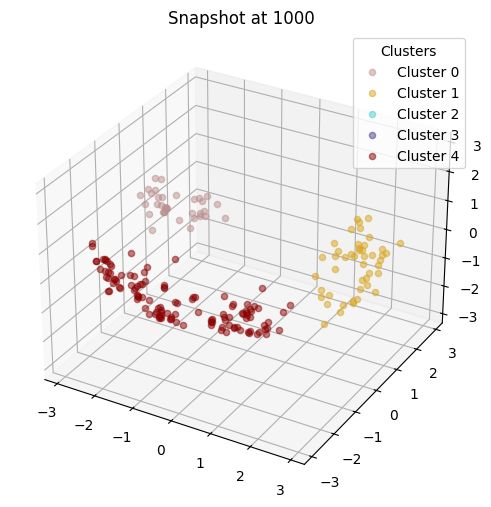

Directory './plots/43971' and its contents removed successfully.


In [292]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=True)